# Nanodet Tutorial

This notebook provides a tutorial for running inference on a static image in order to detect objects.
The implementation of the [NanodetLearner](../../../../docs/reference/nanodet.md) is largely copied from the [Nanodet github](https://github.com/RangiLyu/nanodet).
More information on modifications and license can be found
[here](https://github.com/opendr-eu/opendr/blob/master/src/opendr/perception/object_detection_2d/nanodet/README.md).

First, we need to import the learner and initialize it:

In [1]:
from opendr.perception.object_detection_2d import NanodetLearner

model="plus_m_1.5x_416"

nanodet = NanodetLearner(model_to_use=model, device="cuda")

/home/manos/new_opendr/opendr/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/manos/new_opendr/opendr/venv/lib/python3.8/site-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.8.0` and `torch==1.9.0+cu111` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


model size is  1.5x
init weights...
Finish initialize NanoDet-Plus Head.


Note that we can alter the device (e.g., 'cpu', 'cuda', etc.), on which the model runs, as well as the model from a variety of options included a custom you can make ("EfficientNet_Lite0_320", "EfficientNet_Lite1_416", "EfficientNet_Lite2_512",
                "RepVGG_A0_416", "t", "g", "m", "m_416", "m_0.5x", "m_1.5x", "m_1.5x_416",
                "plus_m_320", "plus_m_1.5x_320", "plus_m_416", "plus_m_1.5x_416", "custom").

After creating our model, we need to download pre-trained weights.

In [2]:
save_path = "./predefined_examples"
nanodet.download(path=save_path, mode="pretrained")

load_model_weights="./predefined_examples/nanodet_{}".format(model)

and load our weights:

In [3]:
nanodet.load(path=load_model_weights, verbose=True)

Model name: plus_m_1.5x_416 --> ./predefined_examples/nanodet_plus_m_1.5x_416/plus_m_1.5x_416.json


INFO:root:No param aux_fpn.reduce_layers.0.conv.weight.
[root][09-01 18:10:13]INFO:No param aux_fpn.reduce_layers.0.conv.weight.
INFO:root:No param aux_fpn.reduce_layers.0.bn.weight.
[root][09-01 18:10:13]INFO:No param aux_fpn.reduce_layers.0.bn.weight.
INFO:root:No param aux_fpn.reduce_layers.0.bn.bias.
[root][09-01 18:10:13]INFO:No param aux_fpn.reduce_layers.0.bn.bias.
INFO:root:No param aux_fpn.reduce_layers.0.bn.running_mean.
[root][09-01 18:10:13]INFO:No param aux_fpn.reduce_layers.0.bn.running_mean.
INFO:root:No param aux_fpn.reduce_layers.0.bn.running_var.
[root][09-01 18:10:13]INFO:No param aux_fpn.reduce_layers.0.bn.running_var.
INFO:root:No param aux_fpn.reduce_layers.0.bn.num_batches_tracked.
[root][09-01 18:10:13]INFO:No param aux_fpn.reduce_layers.0.bn.num_batches_tracked.
INFO:root:No param aux_fpn.reduce_layers.1.conv.weight.
[root][09-01 18:10:13]INFO:No param aux_fpn.reduce_layers.1.conv.weight.
INFO:root:No param aux_fpn.reduce_layers.1.bn.weight.
[root][09-01 18:10:

We will also download one sample image and load it, so we can use it in OpenDR for testing:

In [4]:
nanodet.download(path=save_path, mode="images")

from opendr.engine.data import Image
image_path = "./predefined_examples/000000000036.jpg"
img = Image.open(image_path)

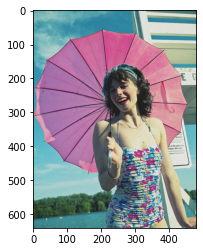

In [5]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(img.opencv(), cv2.COLOR_BGR2RGB))

We are now ready to use our model!
The only thing that we have to do is to pass the image through the model.
Note that there are standard data types supported by OpenDR.
However, OpenDR also understands common data types (e.g,. OpenCV images) and automatically converts them into the most
appropriate format:

In [7]:
boxes = nanodet.infer(input=img)

forward time: 0.030s | decode time: 0.004s | 

/home/manos/new_opendr/opendr/venv/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/home/manos/new_opendr/opendr/venv/lib/python3.8/site-packages/torch/nn/functional.py:3609: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(
/home/manos/new_opendr/opendr/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/manos/new_opendr/opendr/venv/lib/python3.8/site-pac

We can plot the results using a utility function from the Object-Detection-2D module:

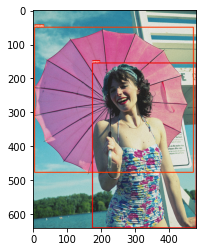

In [8]:
from opendr.perception.object_detection_2d import draw_bounding_boxes

img_annotated = draw_bounding_boxes(img.opencv(), boxes, class_names=nanodet.classes, show=False)

plt.imshow(cv2.cvtColor(img_annotated, cv2.COLOR_BGR2RGB))